In [132]:
#Run
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tensorboardX import SummaryWriter
writer = SummaryWriter()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import preprocessing

%matplotlib inline

# Read the data to train

In [133]:
res = pd.read_csv('train_data_small.csv')

res.head()
res.dropna(inplace = True)

In [134]:
y = res['rent_freq']
x = res.iloc[:,1:]
x = res.drop(columns='return_freq') 
#x['datetime'] = x['datetime'].astype('category').cat.codes
x['icon'] = x['icon'].astype('category').cat.codes
x['holiday'] = x['holiday'].astype('category').cat.codes
x['weekday'] = x['weekday'].astype('category').cat.codes



x.dtypes

rent_freq                 int64
start_station_id          int64
apparent_temperature    float64
cloud_cover             float64
humidity                float64
icon                       int8
precipAccumulation      float64
precip_intensity        float64
temperature             float64
uv_index                float64
visibility              float64
wind_speed              float64
holiday                    int8
weekday                    int8
dtype: object

## Split the data

In [111]:

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

#log y label
y_test_Log = np.log1p(y_test)
y_train_Log = np.log1p(y_train)



## Random Forest Regression

In [135]:
def RMSLE(y,ypred):
    y=np.nan_to_num(y)
    ypred=np.nan_to_num(ypred)
    calc=(ypred-y)**2
    return np.sqrt(np.mean(calc))

In [101]:

rmsle_scorer=sklearn.metrics.make_scorer(RMSLE,greater_is_better=False)

clf_4_cs=RandomForestRegressor()
param={'n_estimators':[200,300,400],'max_depth':[8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=-1,verbose=2)
grid_4_cs.fit(x_train, y_train)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(y_train, grid_4_cs.predict(x_train))))
print ("RMSLE score for casual test %f" %(RMSLE(y_test, grid_4_cs.predict(x_test))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

(100, 500)

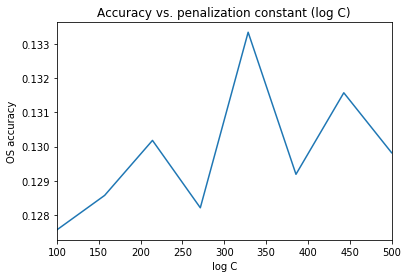

In [22]:
#DO NOT RERUN!!!

OS = []
for i in range(100,500,50):
    rfr = RandomForestRegressor(n_estimators=i,max_depth=10)

    rfr.fit(x_train, y_train)
    score = rfr.score(x_test, y_test)
    OS.append(score)

plt.gca()
plt.plot(np.linspace(100,500,8),OS)
plt.xlabel("log C")
plt.ylabel("OS accuracy")
plt.title("Accuracy vs. penalization constant (log C)")
plt.xlim(100,500)
  

(100, 500)

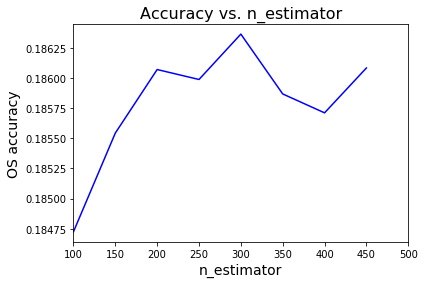

In [60]:
plt.gca()
plt.plot(np.linspace(100,450,8),OS,'db-')
plt.xlabel("n_estimator",fontsize=14)
plt.ylabel("OS accuracy",fontsize=14)
plt.title("Accuracy vs. n_estimator",fontsize=16)
plt.xlim(100,500)

In [136]:


temp = res.iloc[:,1:]
temp['holiday'] = temp['holiday'].astype('category').cat.codes
temp['icon'] = temp['icon'].astype('category').cat.codes
temp['weekday'] = temp['weekday'].astype('category').cat.codes

temp.head()

,start_station_id,return_freq,apparent_temperature,cloud_cover,humidity,icon,precipAccumulation,precip_intensity,temperature,uv_index,visibility,wind_speed,holiday,weekday
0,469,1,31.11,0.44,0.74,4,0.0,0.0,34.29,0.0,10.00,3.64,0,5
1,531,1,20.33,0.08,0.63,1,0.0,0.0,25.80,0.0,10.00,4.49,0,3
2,494,1,30.85,0.82,0.66,4,0.0,0.0,30.85,2.0,10.00,0.58,0,5
3,2008,2,20.46,0.00,0.79,1,0.0,0.0,20.46,0.0,10.00,1.16,0,0
4,447,1,35.37,1.00,0.93,2,0.0,0.0,35.37,0.0,4.16,0.56,0,5


In [137]:
#Whitening+ extract precipaccumulation
temp[['apparent_temperature',\
       'cloud_cover', 'humidity',  'precip_intensity',\
       'temperature', 'uv_index', 'visibility', 'wind_speed',]] = \
preprocessing.scale(temp[['apparent_temperature',\
       'cloud_cover', 'humidity', 'precip_intensity',\
       'temperature', 'uv_index', 'visibility', 'wind_speed',]])


temp.head()

,start_station_id,return_freq,apparent_temperature,cloud_cover,humidity,icon,precipAccumulation,precip_intensity,temperature,uv_index,visibility,wind_speed,holiday,weekday
0,469,1,-0.933761,-0.127153,0.393049,4,0.0,-0.202955,-0.888999,-0.839227,0.422844,0.081775,0,5
1,531,1,-1.454345,-0.994001,-0.164420,1,0.0,-0.202955,-1.336544,-0.839227,0.422844,0.431009,0,3
2,494,1,-0.946317,0.787853,-0.012383,4,0.0,-0.202955,-1.070336,-0.023701,0.422844,-1.175470,0,5
3,2008,2,-1.448067,-1.186634,0.646443,1,0.0,-0.202955,-1.618038,-0.839227,0.422844,-0.937169,0,0
4,447,1,-0.728039,1.221278,1.355948,2,0.0,-0.202955,-0.832068,-0.839227,-2.258029,-1.183688,0,5


In [138]:
temp.shape

(55210, 14)

In [113]:
temp.describe()

,start_station_id,return_freq,apparent_temperature,cloud_cover,humidity,icon,precipAccumulation,precip_intensity,temperature,uv_index,visibility,wind_speed,holiday,weekday
count,55210.000000,55210.000000,5.521000e+04,5.521000e+04,5.521000e+04,55210.000000,55210.000000,5.521000e+04,5.521000e+04,5.521000e+04,5.521000e+04,5.521000e+04,55210.000000,55210.000000
mean,1466.302047,1.314707,-5.391147e-17,8.327175e-16,-2.545489e-16,2.264282,0.001308,-1.157788e-15,-3.227952e-16,-7.670091e-15,-3.132572e-15,-1.969676e-16,0.016320,3.073048
std,1413.382945,0.683167,1.000009e+00,1.000009e+00,1.000009e+00,1.939236,0.018264,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.126702,2.044526
min,72.000000,1.000000,-3.083705e+00,-1.186634e+00,-2.597008e+00,0.000000,0.000000,-2.029549e-01,-2.900050e+00,-8.392272e-01,-4.075880e+00,-1.413772e+00,0.000000,0.000000
25%,361.000000,1.000000,-7.913006e-01,-1.066239e+00,-7.725669e-01,0.000000,0.000000,-2.029549e-01,-7.946405e-01,-8.392272e-01,3.218520e-01,-7.728232e-01,0.000000,1.000000
50%,494.000000,1.000000,-8.237941e-02,-5.491575e-02,3.829605e-02,2.000000,0.000000,-2.029549e-01,-9.933877e-02,-4.314639e-01,4.228437e-01,-1.359834e-01,0.000000,3.000000
75%,3178.000000,1.000000,8.032892e-01,1.221278e+00,9.505168e-01,4.000000,0.000000,-2.029549e-01,8.298828e-01,7.918259e-01,4.228437e-01,5.542687e-01,0.000000,5.000000
max,3749.000000,10.000000,2.666864e+00,1.221278e+00,1.660022e+00,8.000000,0.802000,3.289414e+01,2.350822e+00,3.238406e+00,4.228437e-01,5.648987e+00,1.000000,6.000000


In [114]:
x_train, x_test, y_train, y_test=train_test_split(temp,y,test_size=0.25)


In [107]:
#x without percipaccumulation
#n = 300
rfr = RandomForestRegressor(n_estimators=300,max_depth=10)

rfr.fit(x_train, y_train)
score = rfr.score(x_test, y_test)

In [115]:
score

0.1285103491313776

In [116]:
rfr.feature_importances_

array([0.30549979, 0.05207213, 0.10085774, 0.04388364, 0.09104479,
       0.0147877 , 0.00254623, 0.01889491, 0.10853646, 0.0702784 ,
       0.04687423, 0.10471942, 0.00155155, 0.03845301])

In [148]:
#cross validation
validation = pd.read_csv('train_data.csv').dropna()
validation.dropna(inplace = True)
y = validation['rent_freq']

temp = validation.iloc[:,1:]
#temp = temp.drop(columns=['return_freq']) 
temp['holiday'] = temp['holiday'].astype('category').cat.codes
temp['icon'] = temp['icon'].astype('category').cat.codes
temp['weekday'] = x['weekday'].astype('category').cat.codes
temp[['apparent_temperature',\
       'cloud_cover', 'humidity', 'precip_intensity',\
       'temperature', 'uv_index', 'visibility', 'wind_speed',]] = \
preprocessing.scale(temp[['apparent_temperature',\
       'cloud_cover', 'humidity', 'precip_intensity',\
       'temperature', 'uv_index', 'visibility', 'wind_speed',]])

x1_train, x_val, y1_train, y_val=train_test_split(temp,y,test_size=0.25)


In [149]:
temp.shape

(552105, 14)

In [150]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552105 entries, 0 to 552104
Data columns (total 14 columns):
start_station_id        552105 non-null int64
return_freq             552105 non-null int64
apparent_temperature    552105 non-null float64
cloud_cover             552105 non-null float64
humidity                552105 non-null float64
icon                    552105 non-null int8
precipAccumulation      552105 non-null float64
precip_intensity        552105 non-null float64
temperature             552105 non-null float64
uv_index                552105 non-null float64
visibility              552105 non-null float64
wind_speed              552105 non-null float64
holiday                 552105 non-null int8
weekday                 55210 non-null float64
dtypes: float64(10), int64(2), int8(2)
memory usage: 55.8 MB


In [151]:
print ("RMSLE score for casual test %f" %(RMSLE(y_val, rfr.predict(x_val))))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Gradient Boosting on Regression Tree

ValueError: x and y must have same first dimension, but have shapes (300,) and (6,)

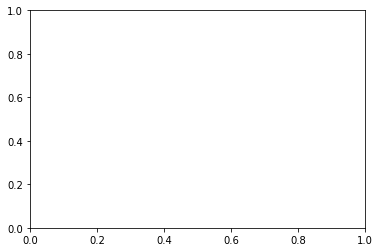

In [97]:
# DO NOT RERUN!!!
#plot the accuracy
N = np.linspace(3000, 5000, 6)

OS = []
for c in N:
    c = int(c)
    clf = GradientBoostingRegressor(n_estimators=c, alpha = 0.01) 
    clf.fit(x_train, y_train)
    MSE=RMSLE(y_train, clf.predict(x_train))
    OS.append(MSE)
    print(1)

plt.gca()
plt.plot(np.linspace(-10,10,300),OS)
plt.xlabel("n_estimator")
plt.ylabel("OS accuracy")
plt.title("Accuracy vs. n_estimator ")
plt.xlim(-10,10)
plt.show()

In [105]:
print(OS)

[0.4083588057570789, 0.4063783656298716, 0.4044616433353723, 0.40271521991549236, 0.40136370433077007, 0.40009214550856464]


Text(0.5, 1.0, 'MSE vs. n_estimator ')

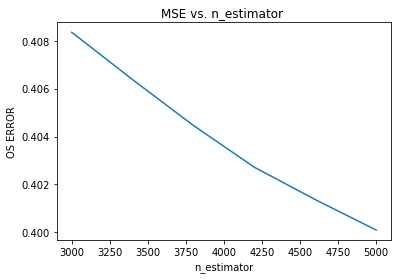

In [117]:
plt.gca()
plt.plot(np.linspace(3000, 5000, 6),OS,"db-")
plt.xlabel("n_estimator")
plt.ylabel("OS ERROR")
plt.title("MSE vs. n_estimator ")



In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=5000,alpha=0.01); ### Test 0.41
gbm.fit(x_train,y_train)
preds = gbm.predict(X= x_test)

#print ("RMSLE Value For Gradient Boost: ",RMSLE(np.exp(y_test_Log),np.exp(preds),False))

In [120]:
print ("RMSLE Value For Gradient Boost: ",RMSLE(y_test,preds)) 

RMSLE Value For Gradient Boost:  0.4130597104040124


In [122]:
# from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test,preds))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## SVR

In [127]:
#find the best
from sklearn.svm import SVR
rmsle_scorer=sklearn.metrics.make_scorer(RMSLE,greater_is_better=False)

rg_svr=SVR()
param={'C': np.logspace(-3, 2, 2), 'gamma': np.logspace(-3, 2, 2), 'kernel' :['rbf','sigmoid']}
grid_4_cs=GridSearchCV(rg_svr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=-1,verbose=2)
grid_4_cs.fit(x_train, y_train)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(y_train, grid_4_cs.predict(x_train))))
print ("RMSLE score for casual test %f" %(RMSLE(y_test, grid_4_cs.predict(x_test))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
#plot the accuracy
C = np.logspace(-3, 2, 6)
OS = []
for c in C:
    clf = svm.SVR(kernel='sigmoid',C=c) 
    clf.fit(x_train, y_train)
    MSE= RMSLE(y_train, grid_4_cs.predict(x_train))
    OS.append(MSE)

plt.gca()
plt.plot(np.logspace(-3, 2, 6),OS)
plt.xlabel("log C")
plt.ylabel("OS accuracy")
plt.title("Accuracy vs. penalization constant (log C)")

plt.show()

In [129]:
#need modified according to the previous result
from sklearn.svm import SVR
#need to change the kernel from Gaussian Kernel to RBM
svr = SVR(kernel='sigmoid',C=np.log(2))#
y_train_Log = np.log1p(y_train)
svr.fit(x_train,y_train_Log)
y_test_Log = np.log1p(y_test)
preds = svr.predict(X= x_test)
print ("RMSLE Value For Gradient Boost: ",RMSLE(y_test,preds,False))

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TypeError: RMSLE() takes 2 positional arguments but 3 were given

In [ ]:
imshow(confusion_matrix(np.exp(y_test_Log),np.exp(preds)))

In [ ]:
## Cluster